In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [37]:
df = pd.read_csv('frutas_dataset.csv')

In [38]:
df.head()

,peso,textura,fruta
0,156,lisa,maçã
1,132,rugosa,laranja
2,136,rugosa,laranja
3,135,lisa,maçã
4,153,lisa,maçã


In [39]:
df.describe()

,peso
count,100.000000
mean,147.640000
std,13.250897
min,116.000000
25%,138.000000
50%,147.000000
75%,158.000000
max,180.000000


In [40]:
df['fruta'].value_counts()

fruta
maçã       66
laranja    34
Name: count, dtype: int64

# Trabalhando os dados

Pre

In [41]:
df_dados = df.copy()

lb = LabelEncoder()

for variavel in ['textura', 'fruta']:
    df_dados[variavel] = lb.fit_transform(df_dados[variavel])

df_dados

,peso,textura,fruta
0,156,0,1
1,132,1,0
2,136,1,0
3,135,0,1
4,153,0,1
...,...,...,...
95,147,0,1
96,154,0,1
97,158,0,1
98,158,0,1


In [42]:
# Analisando correlaçao das variaveis preditivas

df_dados.corr()

,peso,textura,fruta
peso,1.000000,-0.722140,0.766555
textura,-0.722140,1.000000,-0.936563
fruta,0.766555,-0.936563,1.000000


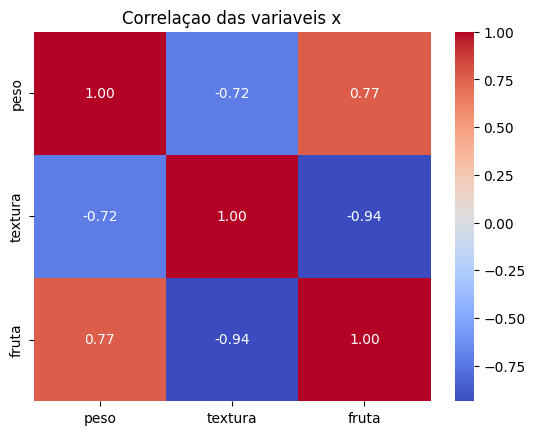

In [43]:
# Correlaçao de forma Grafica

sns.heatmap(df_dados.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlaçao das variaveis x")
plt.show()

In [44]:
correlacao_com_alvo = df_dados.corr(numeric_only=True)['fruta'].sort_values(ascending=False)

display(correlacao_com_alvo)

fruta      1.000000
peso       0.766555
textura   -0.936563
Name: fruta, dtype: float64

 # Preparando os dados para o treinamento

- Devemos preparar os dados preditivos da variavel alvo
- Tambem Separamos 70% dos dados para treinamento e 30% para Vadalição

In [45]:
# Separando a preditora da target

variaveis_x = df_dados.drop('fruta', axis=1)

variavel_y = df['fruta']


In [46]:
# Separando os dados em treino e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size=0.3, random_state=10)

In [47]:
# Treinando o modelo

modelo = KNeighborsClassifier()

modelo.fit (x_treino, y_treino)

KNeighborsClassifier()

In [48]:
# Testando o modelo com a variaveis separadas por teste

resultado_teste = modelo.predict(x_teste)

print(resultado_teste)

['maçã' 'maçã' 'maçã' 'maçã' 'laranja' 'laranja' 'maçã' 'maçã' 'laranja'
 'maçã' 'laranja' 'laranja' 'maçã' 'laranja' 'maçã' 'laranja' 'laranja'
 'maçã' 'maçã' 'maçã' 'maçã' 'laranja' 'laranja' 'maçã' 'laranja'
 'laranja' 'maçã' 'maçã' 'maçã' 'maçã']


In [49]:
import pickle

with open('modelo_fruta.pkl', 'wb') as file:
    pickle.dump(modelo, file)

In [50]:
# Verificando  acuaracia

score = accuracy_score(y_teste, resultado_teste)

score

0.9

In [51]:
for comparacao in zip(y_teste, resultado_teste):
    print(comparacao)

('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'maçã')
('maçã', 'maçã')
('maçã', 'laranja')
('maçã', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('laranja', 'laranja')
('laranja', 'laranja')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')
('maçã', 'maçã')


In [52]:
# Tentando prever uma nova fruta

fruta_nova = [[120, 1]]
resposta = modelo.predict(fruta_nova)

print(resposta)

['laranja']


c:\Users\Professor\Desktop\flask_colaborativo\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


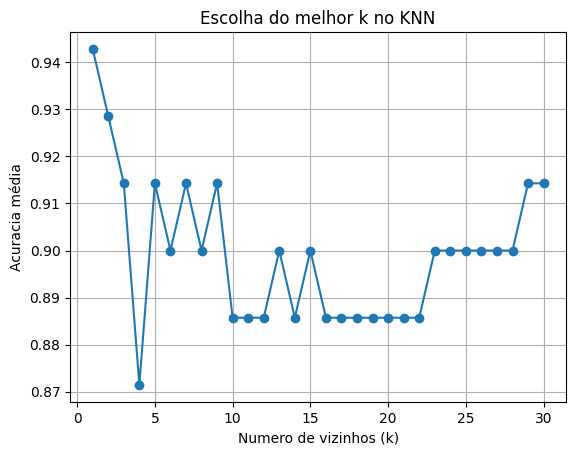

In [53]:
from sklearn.model_selection import cross_val_score

acuracia = []
k_values = range(1, 31)

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelo, x_treino, y_treino, cv=5, scoring='accuracy')
    acuracia.append(scores.mean())

plt.plot(k_values, acuracia, marker='o')
plt.xlabel('Numero de vizinhos (k)')
plt.ylabel('Acuracia média')
plt.title('Escolha do melhor k no KNN')
plt.grid(True)
plt.show()

